In [90]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn import preprocessing 
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('../data/insurance_2.csv')

In [3]:
df_cut= df.copy()


## T-test before& after 

In [4]:
#data
alpha = 0.05
range1= -1.833
range2= 1.833
before = [185,192,206,177,225,168,256,239,199,218] 
after = [169,187,193,176,194,171,228,217,204,195]
len(after)

10

In [5]:
stats.ttest_rel(before,after)

TtestResult(statistic=3.180440336417639, pvalue=0.011176870661470717, df=9)

In [6]:
Id = 2022238 
print("my id id ",Id)

my id id  2022238


# Data frame 

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# instruction 

In [8]:
# female and male avg charges 
# female and male avg ages
#no of somker and non smoker
# find out most populated region 
# who has more children

# which region has most smoker? 
# smoker effect on charges?
# smoker avg ages
# does somker has more children or non-somker 


# region avg bmi 
#region genders 
# region charges 
# which region has more children ?

# does children effect on charges ?
# children and bmi retion 


# visualization

Text(0.5, 1.0, 'region-smoker-charges')

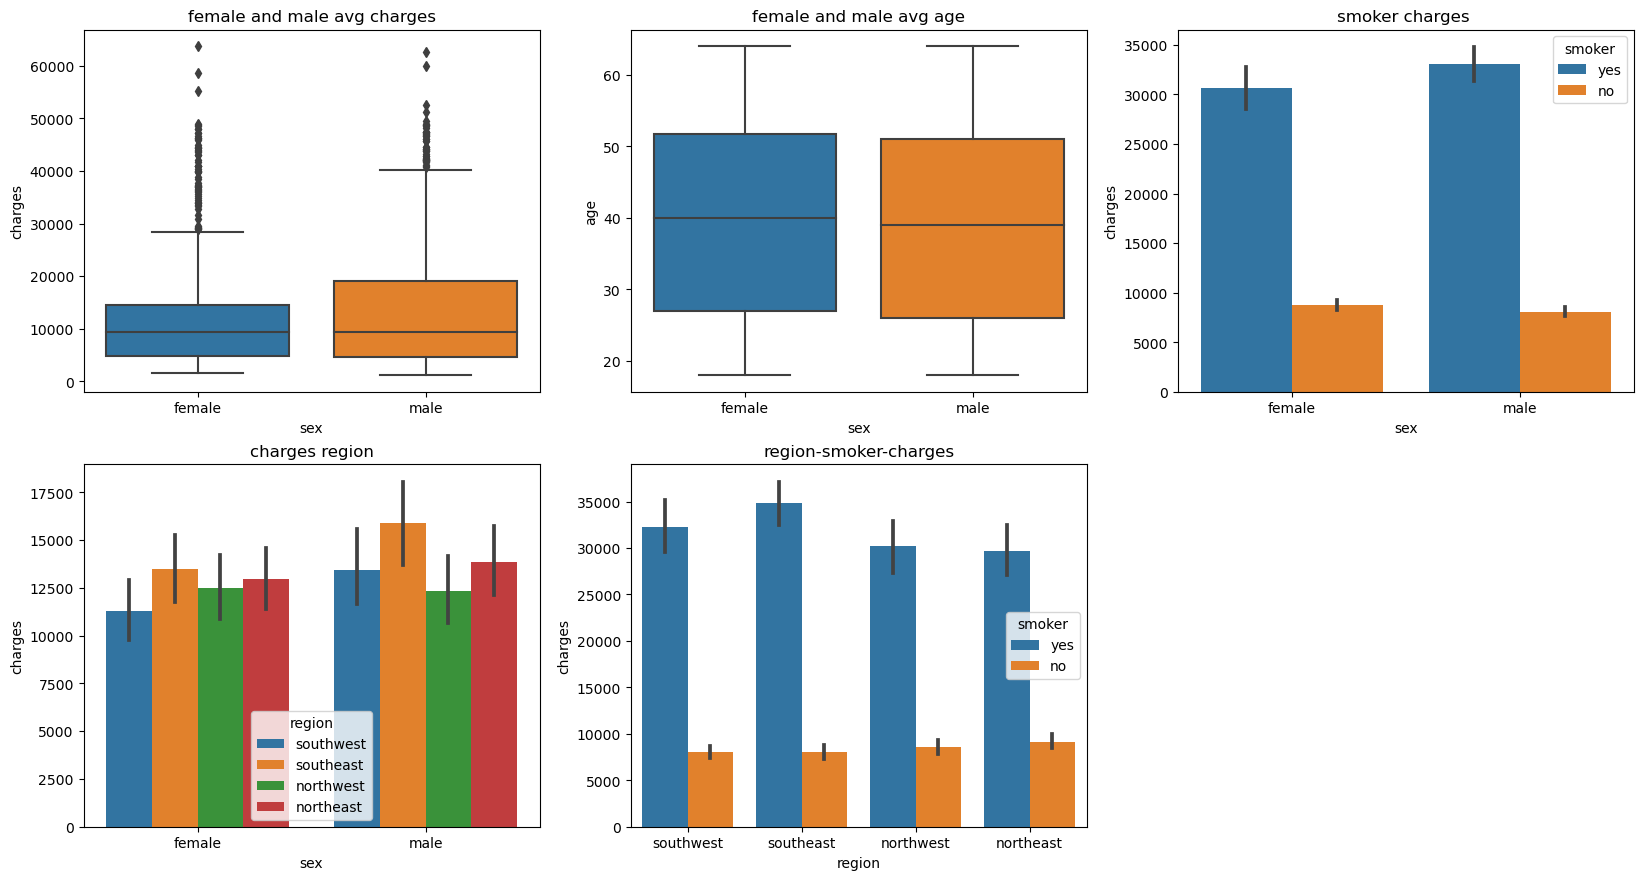

In [9]:
plt.figure(figsize=(20,16))
plt.subplot(3,3,1)
sns.boxplot(data=df,x='sex',y='charges')
plt.title('female and male avg charges')


plt.subplot(3,3,2)
sns.boxplot(data=df,x='sex',y='age')
plt.title('female and male avg age')
          
plt.subplot(3,3,3)
sns.barplot(data=df,x='sex',y='charges',hue='smoker')
plt.title('smoker charges ')
          
plt.subplot(3,3,4)
sns.barplot(data=df,x='sex',y='charges',hue='region')
plt.title('charges region')


plt.subplot(3,3,5)
sns.barplot(data=df,x= 'region',y = 'charges',hue='smoker')
plt.title('region-smoker-charges')
          


Text(0.5, 1.0, 'most children(smoker vs non smoker)')

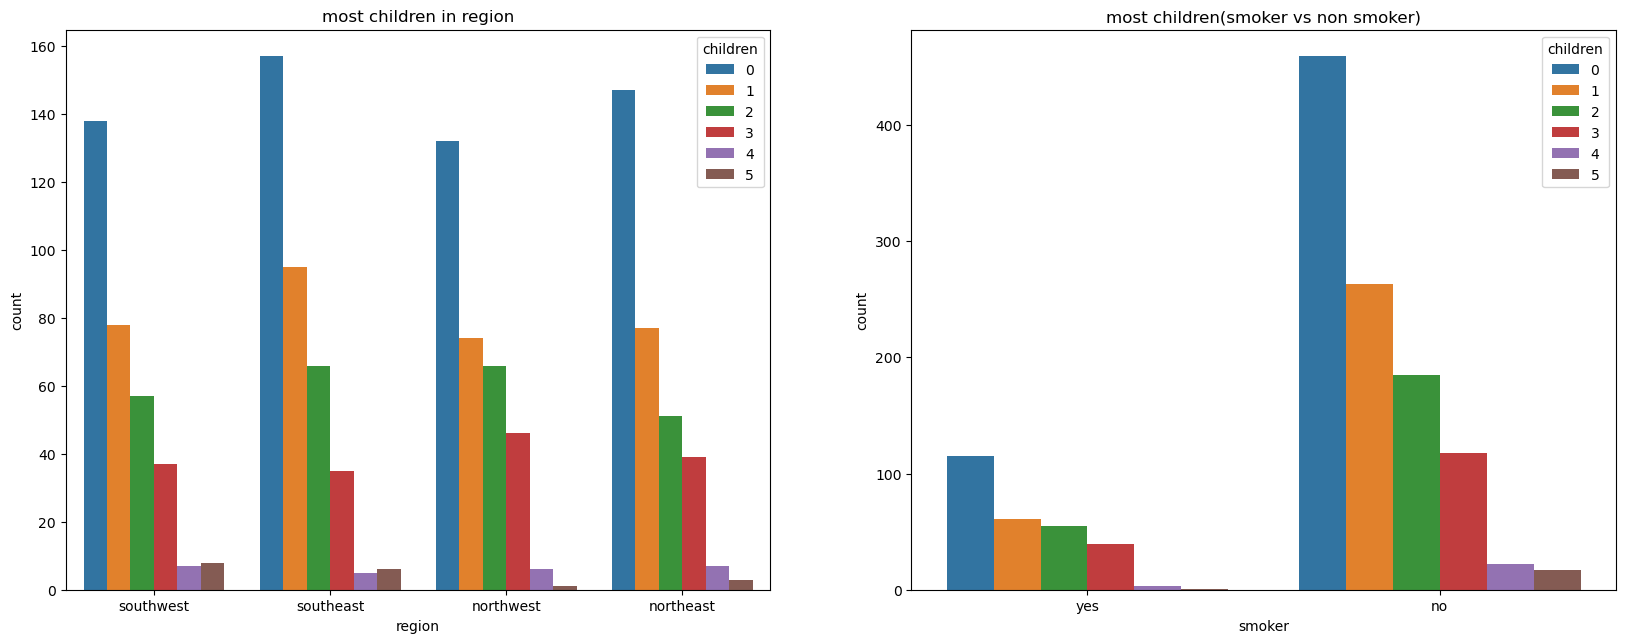

In [10]:
#most somker in region
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
sns.countplot(data= df, x= 'region',hue='children')
plt.title('most children in region')

plt.subplot(2,2,2)
sns.countplot(data= df, x= 'smoker',hue='children')
plt.title('most children(smoker vs non smoker)')

Text(0.5, 1.0, 'regional charges effect by no: of children  ')

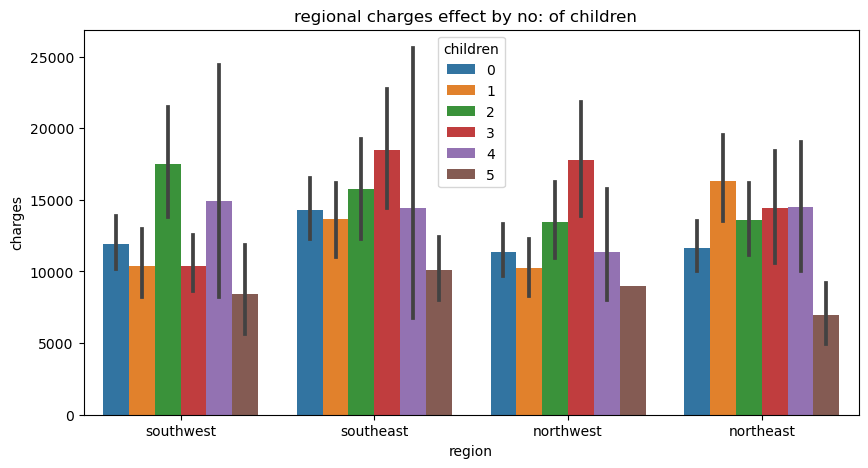

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='region',y='charges',hue='children')
plt.title('regional charges effect by no: of children  ')

<Axes: xlabel='region', ylabel='count'>

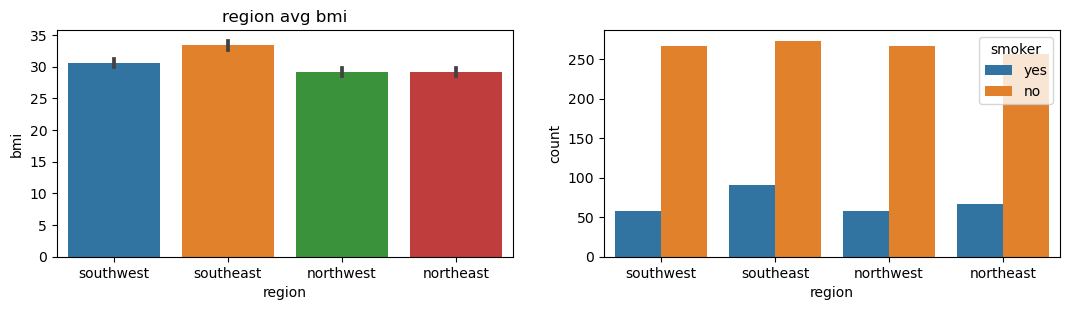

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.barplot(data= df, x= 'region', y= 'bmi')
plt.title("region avg bmi")

plt.subplot(3,3,2)
sns.countplot(data= df,x='region', hue='smoker' )



<Axes: xlabel='age', ylabel='charges'>

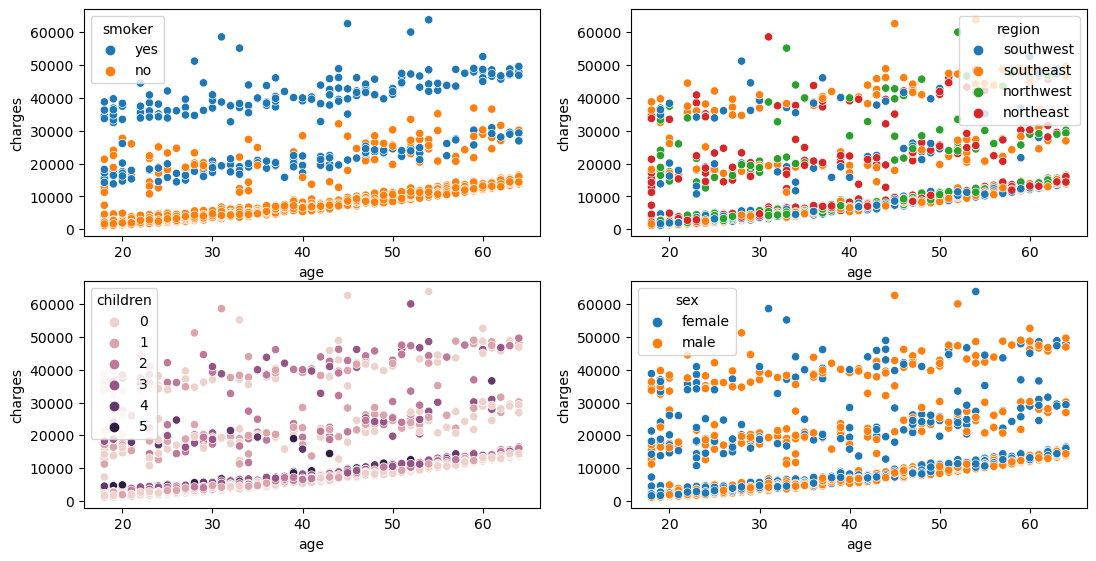

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.scatterplot(data=df,x='age',y='charges',hue='smoker')

plt.subplot(3,3,2)
sns.scatterplot(data=df,x='age',y='charges',hue='region')
print('\n')

plt.subplot(3,3,4)
sns.scatterplot(data=df,x='age',y='charges',hue='children')


plt.subplot(3,3,5)
sns.scatterplot(data=df,x='age',y='charges',hue='sex')


In [14]:
def reg_fun(df,var_1,var_2):
     return sns.scatterplot(data= df, x= var_1, y= var_2)
def boxplot_fun(df,var_1,var_2):
    return sns.boxplot(data=df,x=var_1,y=var_2)
    

In [15]:
def fig_1(df):
    plt.figure(figsize=(10,20))
    plt.subplot(3,1,1)
    reg_fun(df,'age','charges')


## Observation 

1. Male and female ratios same in this dataset
2. Males has more higher outlier in charges 
3. The Smoker males charge higher than the female smoker
4. Avg charge males and females in different regions
5. All region has a high amount of no-child and a very low rate of 5-child
6. The region avg BMI is almost the same.
7. Our most important feature are "Age" and "charges"
8. smoker does more expenses than non somoker 

# Outlier

In [16]:
# our most important feature are Age amd charges. So we remove outlier from this two fields
# IQR=  
# Upper~Fence = Q3  +1.5 IQR
# Lower~Fence = Q1  - 1.5 IQR
df_2 = df.copy()
df_2.shape


(1338, 7)

In [17]:
def outlier_fun(df,var):
    Q1=  np.percentile(df[var],25)
    Q2=  np.percentile(df[var],75)
    IQR=  Q2-Q1
    upper_outlier=  Q2 + 1.5*IQR
    lower_outlier=  Q1 - 1.5*IQR
    df = df[( df[var]<upper_outlier ) & (df[var]>lower_outlier)]
    return df

#     print('q1 = ',Q1,' Q2= ',Q2, ' IQR = ',IQR,' upper_outlier = ',upper_outlier,'lower_outlier',lower_outlier)
    

In [18]:
def outlier_fun_2 (ff,var):
    Q1=  np.percentile(ff[var],25)
    Q2=  np.percentile(ff[var],75)
    IQR=  Q2-Q1
    upper_outlier=  Q2 + 1.5*IQR
    lower_outlier=  Q1 - 1.5*IQR
    indexes = ff[( ff[var]>upper_outlier ) | (ff[var]<lower_outlier)].index
    return indexes
    

In [19]:
df_2= outlier_fun(df_2,'charges')
df_2= outlier_fun(df_2,'bmi')
df_2= outlier_fun(df_2,'age')
# print(bmi.shape,age.shape)
print(df_2.shape)

(1186, 7)


#### After Outlier 

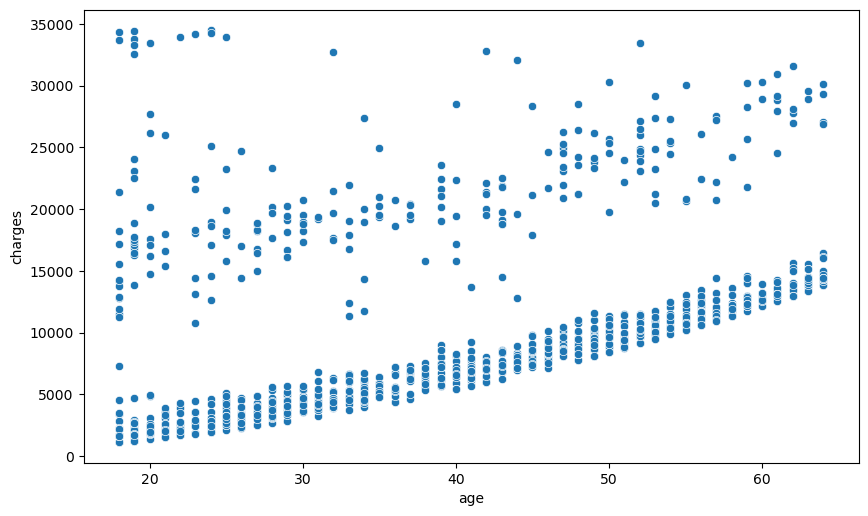

In [20]:

fig_1(df_2)
# fig_2(df_2,threshold_1,threshold_2)

# Label encoder

In [21]:
label_encoder_sex = preprocessing.LabelEncoder() 
label_encoder_smoker = preprocessing.LabelEncoder()
label_encoder_region = preprocessing.LabelEncoder() 

df_2['usex']= label_encoder_sex.fit_transform(df_2['sex'])
df_2['usmoker']= label_encoder_sex.fit_transform(df_2['smoker'])
df_2['uregion']= label_encoder_region.fit_transform(df_2['region'])

df_3=  df_2[['age','bmi','children','usex','uregion','usmoker','charges']]
# df_3.head()


In [22]:
df_3['bmi']=df_3['bmi'].astype(int)
df_3['charges']=df_3['charges'].astype(int)
df_3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1186 non-null   int64
 1   bmi       1186 non-null   int32
 2   children  1186 non-null   int64
 3   usex      1186 non-null   int32
 4   uregion   1186 non-null   int32
 5   usmoker   1186 non-null   int32
 6   charges   1186 non-null   int32
dtypes: int32(5), int64(2)
memory usage: 51.0 KB


C:\Users\USER\AppData\Local\Temp\ipykernel_6928\1962348464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['bmi']=df_3['bmi'].astype(int)
C:\Users\USER\AppData\Local\Temp\ipykernel_6928\1962348464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['charges']=df_3['charges'].astype(int)


# Model creation

1. linear regression 
2. spliting regression
3. svm normal 
4. rbf svm 
5. spliting by svm classifier
6. multiple svm 

In [23]:
#step-1 we train our model with outlier and without categorized data 
#step-2 we train out model after removing outler and catagorize data 
#step-3 than we compare 

### linear reg (all column)

In [24]:
# df_3_smk_yes= df_3[df_3['usmoker']==1]
# df_3_smk_no= df_3[df_3['usmoker']==0]
# print(df_3_smk_yes.shape, df_3_smk_no.shape)


In [25]:
x= df_3[['age','bmi','children','usex','uregion','usmoker']]
y= df_3['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
linearReg= LinearRegression()

In [26]:
x_train.shape, x_test.shape

((889, 6), (297, 6))

In [27]:
linear_reg_predict = linearReg.fit(x_train,y_train)

prediction= linear_reg_predict.predict(x_test)

linear_reg_predict.score(x_test,y_test)

0.5499831625465263

In [28]:
# sns.scatterplot(data= df_3_smk_no,x='age',y='charges',hue='uregion')

### Linear reg using important column

In [29]:
# fig1_fun(df)

<Axes: xlabel='age', ylabel='charges'>

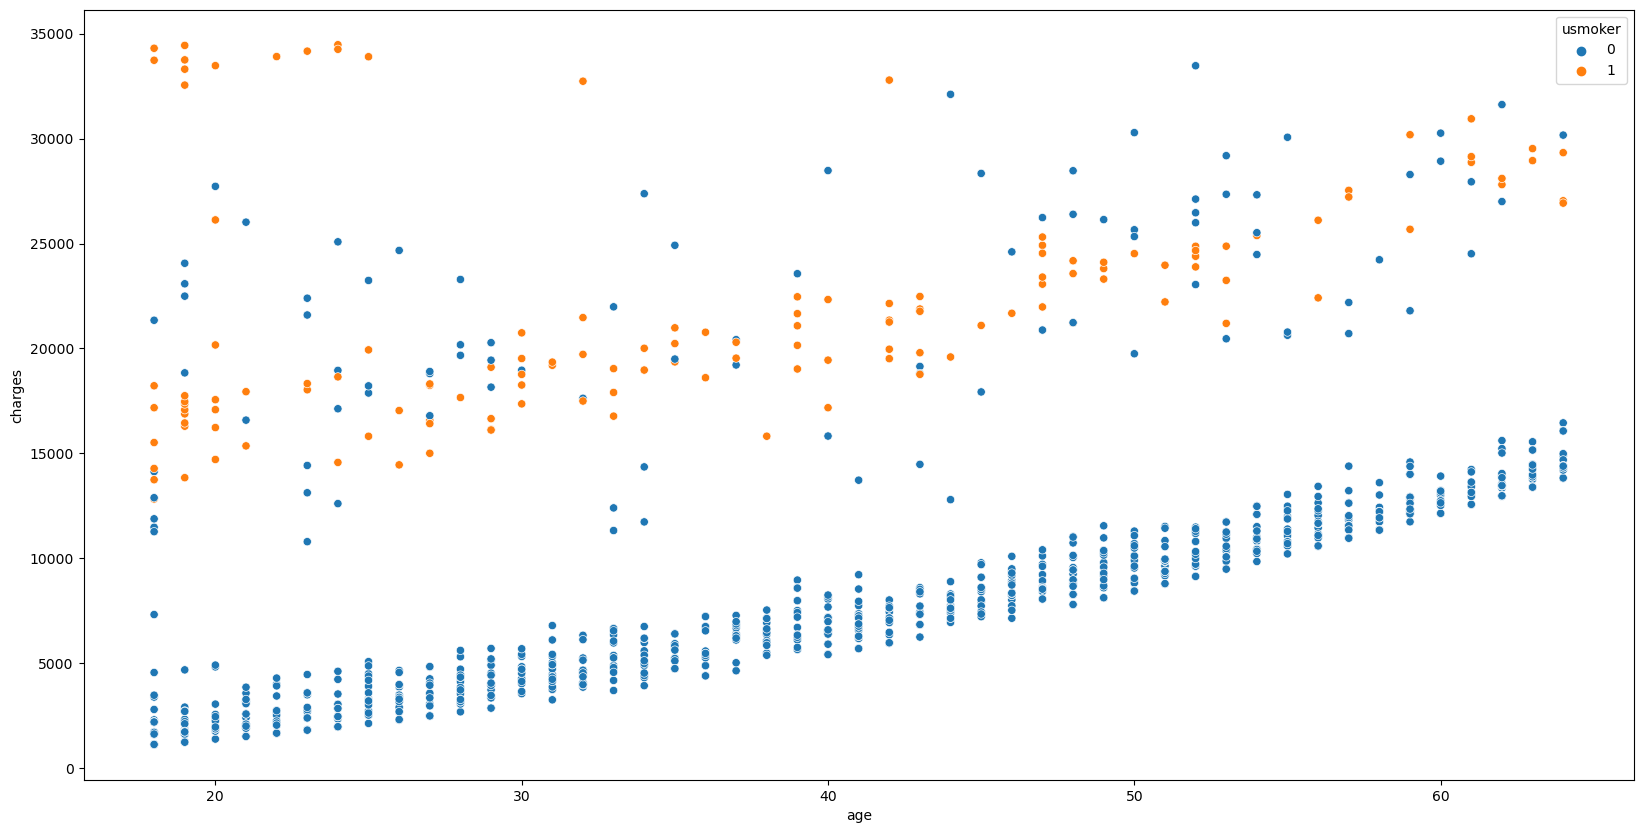

In [30]:
plt.figure(figsize=(20,10))
sns.scatterplot(data= df_3,x='age',y='charges',hue='usmoker')

In [31]:
# here we can see the smokers have more charges than non-smokers
# we can separate them 
# we also see there are outlier exist on age and charges ratio
# we cataogrise by aging and remove the outlier  

In [72]:
df_3_smk_yes= df_3[df_3['usmoker']==1]
df_3_smk_no= df_3[df_3['usmoker']==0]
df_3_smk_yes_2= df_3_smk_yes.copy()
print('Before separating = ',df_3.shape)
print('After separation the smoker group shape= ',df_3_smk_yes.shape)
print('After separation the Non- smoker group shape= ',df_3_smk_no.shape)


Before separating =  (1186, 7)
After separation the smoker group shape=  (138, 7)
After separation the Non- smoker group shape=  (1048, 7)


In [33]:
cutoff= [10,20,30,40,50,60,70,80,90,100]
label =['11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
df_3_smk_yes['age_cat'] = pd.cut(df_3_smk_yes['age'],bins= cutoff,labels= label)
df_3_smk_no['age_cat'] = pd.cut(df_3_smk_no['age'],bins= cutoff,labels= label)
# print(len(cutoff),len(label))

C:\Users\USER\AppData\Local\Temp\ipykernel_6928\1297879266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_smk_yes['age_cat'] = pd.cut(df_3_smk_yes['age'],bins= cutoff,labels= label)
C:\Users\USER\AppData\Local\Temp\ipykernel_6928\1297879266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_smk_no['age_cat'] = pd.cut(df_3_smk_no['age'],bins= cutoff,labels= label)


#### fristly we focus on non- smoker group


Text(0.5, 1.0, ' Before removing outlier according to age and charges ratio')

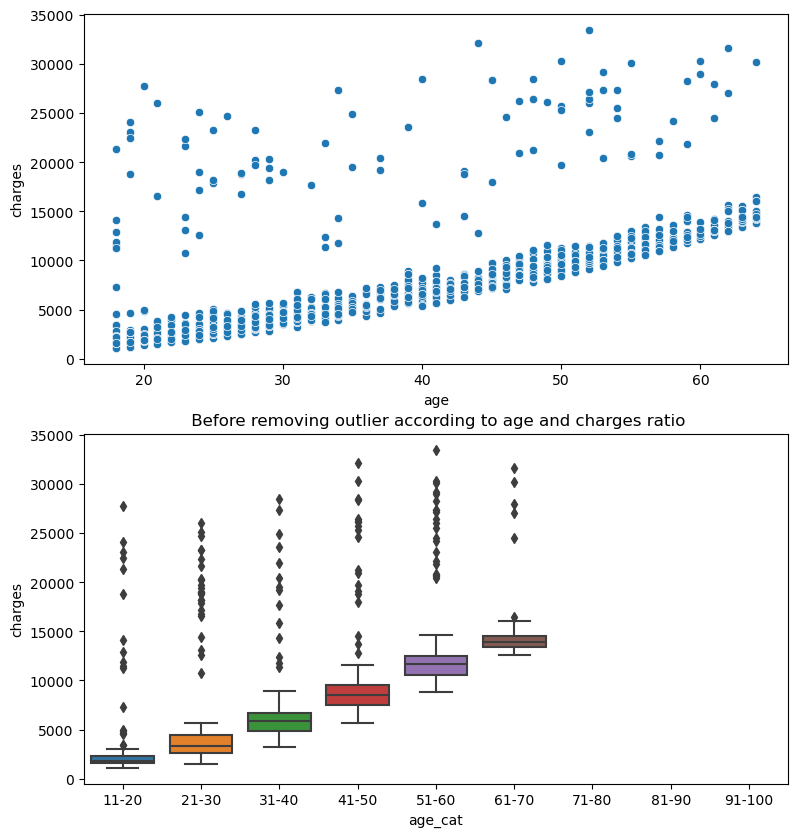

In [34]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.scatterplot(data= df_3_smk_no ,x='age',y='charges')
plt.grid

plt.subplot(2,2,3)
sns.boxplot(data=df_3_smk_no,x='age_cat',y='charges' )




plt.title(" Before removing outlier according to age and charges ratio")

In [35]:
x_age_Bfore_del_outlier=    df_3_smk_no[['age']]
y_charges_Bfore_del_outlier =  df_3_smk_no['charges']


x_train_smk_no_Bfore_del_outlier, x_test_smk_no_Bfore_del_outlier, y_train_smk_no_Bfore_del_outlier, y_test_smk_no_Bfore_del_outlier  =train_test_split(
    
    x_age_Bfore_del_outlier, 
    y_charges_Bfore_del_outlier, 
    test_size=0.25, random_state=42
)

linearReg_smk_no_Bfore_del_outlier = LinearRegression()
linearReg_smk_no_Bfore_del_outlier.fit(x_train_smk_no_Bfore_del_outlier,y_train_smk_no_Bfore_del_outlier)
linearReg_smk_no_Bfore_del_outlier.score(x_test_smk_no_Bfore_del_outlier,y_test_smk_no_Bfore_del_outlier)

0.45966573967270785

In [36]:
# after age- charges outlier remove 

In [37]:
for i in df_3_smk_no['age_cat'].unique():
    dataset = df_3_smk_no[df_3_smk_no['age_cat']==f'{i}']
    indexes= outlier_fun_2(dataset,'charges')
    df_3_smk_no.drop(index=indexes,inplace=True)
#     print(len(indexes))
    

C:\Users\USER\AppData\Local\Temp\ipykernel_6928\3560573099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_smk_no.drop(index=indexes,inplace=True)


Text(0.5, 1.0, ' After removing outlier according to age and charges ratio')

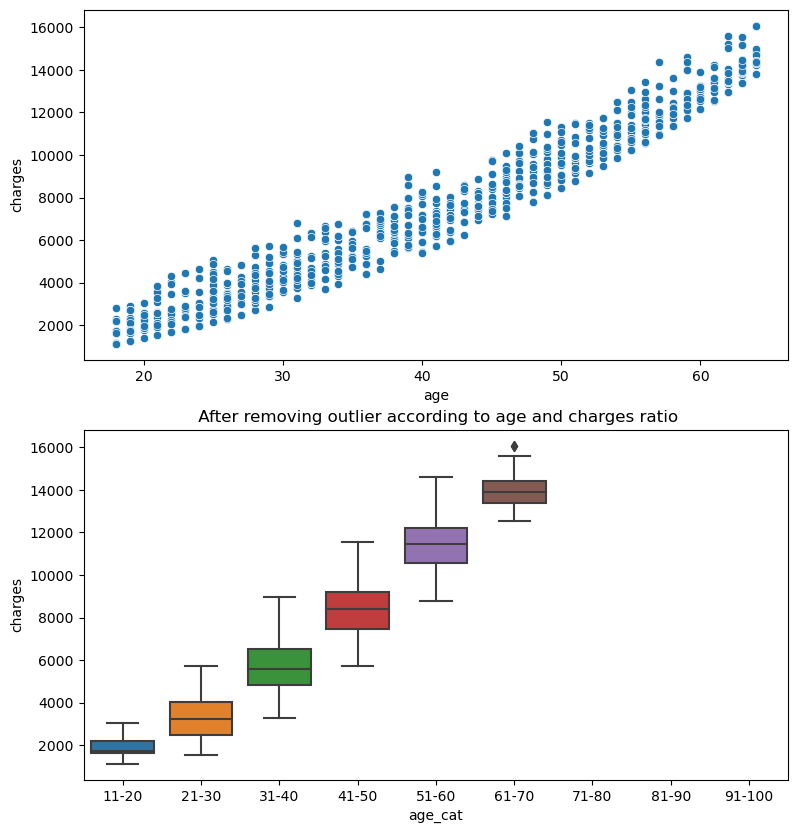

In [38]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.scatterplot(data= df_3_smk_no ,x='age',y='charges')
plt.grid

plt.subplot(2,2,3)
sns.boxplot(data=df_3_smk_no,x='age_cat',y='charges' )




plt.title(" After removing outlier according to age and charges ratio")

In [39]:
x_age_af_del_outlier= df_3_smk_no[['age']]
y_charges_af_del_outlier= df_3_smk_no['charges']


x_train_af_del_outlier, x_test_af_del_outlier, y_train_af_del_outlier, y_test_af_del_outlier = train_test_split(x_age_af_del_outlier, 
                                                                                                                y_charges_af_del_outlier,
                                                                                                                
                                                                                                                test_size=0.25, random_state=42)



linear_reg_age_charges_af_del_outlier = LinearRegression()
linear_reg_age_charges_af_del_outlier.fit(x_train_af_del_outlier,y_train_af_del_outlier)


linear_reg_age_charges_af_del_outlier.score(x_test_af_del_outlier,y_test_af_del_outlier)

0.9565741029600014

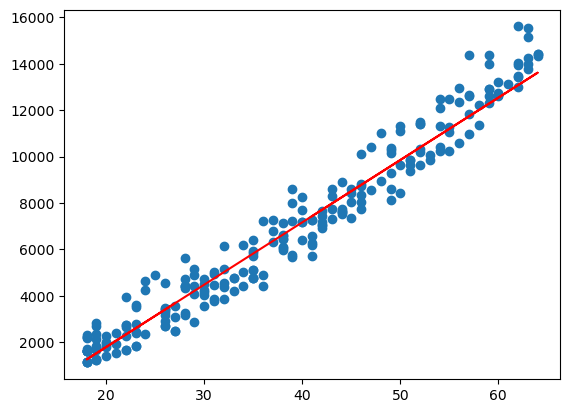

In [40]:
prediction_af_del_outlier = linear_reg_age_charges_af_del_outlier.predict(x_test_af_del_outlier)

x_temp=[1,2,3,4,5,6,7,8]
y_temp= np.sqrt(x_temp )
plt.scatter(x_test_af_del_outlier,y_test_af_del_outlier)
plt.plot(x_test_af_del_outlier,prediction_af_del_outlier,color='red')


# plt.scatter(x_temp,y_temp)
# plt.plot(x_temp,x_temp)

# smoker model 

<Axes: xlabel='age', ylabel='charges'>

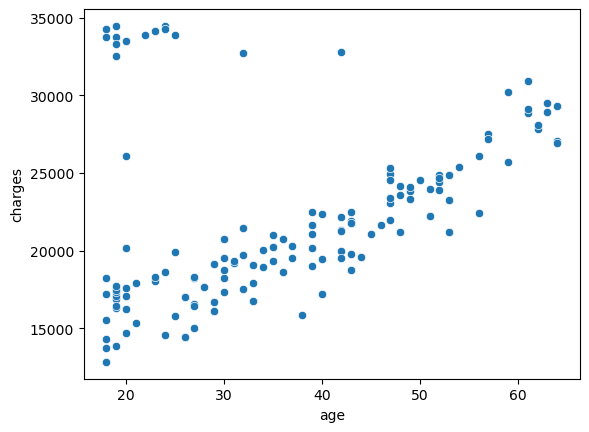

In [41]:
sns.scatterplot(data= df_3_smk_yes,x= 'age',y= 'charges')

In [77]:
# df_3_smk_yes.shape
smk_yes_age_bf_del = df_3_smk_yes_2[['age']]
smk_yes_charge_bf_del = df_3_smk_yes_2['charges']

x_train_bf_del, x_test_bf_del, y_train_bf_del, y_test_bf_del = train_test_split(smk_yes_age_bf_del, smk_yes_charge_bf_del , test_size=0.33, random_state=42)


In [87]:
df_3_smk_yes_2.shape

(138, 7)

In [85]:
smk_yes_bf_del= LinearRegression()
smk_yes_bf_del.fit(x_train_bf_del,y_train_bf_del)
smk_yes_bf_del_predict = smk_yes_bf_del.predict(x_test_bf_del)

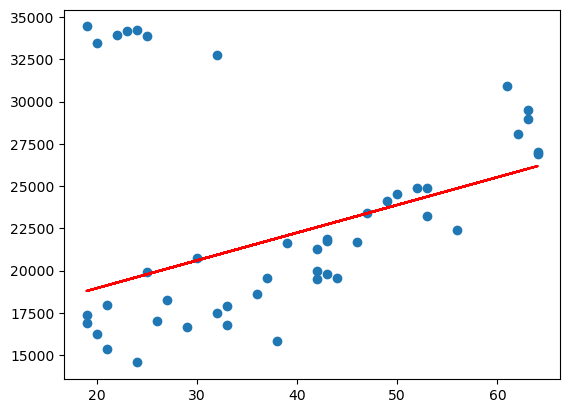

In [89]:
plt.scatter(x_test_bf_del,y_test_bf_del)
plt.plot(x_test_bf_del,smk_yes_bf_del_predict,color='r')

In [91]:
r2_score(y_test_bf_del,smk_yes_bf_del_predict)

-0.04116856328964835

In [82]:
smk_yes_bf_del.score(x_test_bf_del,y_test_bf_del)

-0.04116856328964835

In [44]:
for i in df_3_smk_yes['age_cat'].unique():
    dataset = df_3_smk_yes[df_3_smk_yes['age_cat']==f'{i}']
    indexes= outlier_fun_2(dataset,'charges')
    df_3_smk_yes.drop(index=indexes,inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_6928\2817720569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_smk_yes.drop(index=indexes,inplace=True)


In [45]:
df_3_smk_yes.shape

(129, 8)

<Axes: xlabel='age_cat', ylabel='charges'>

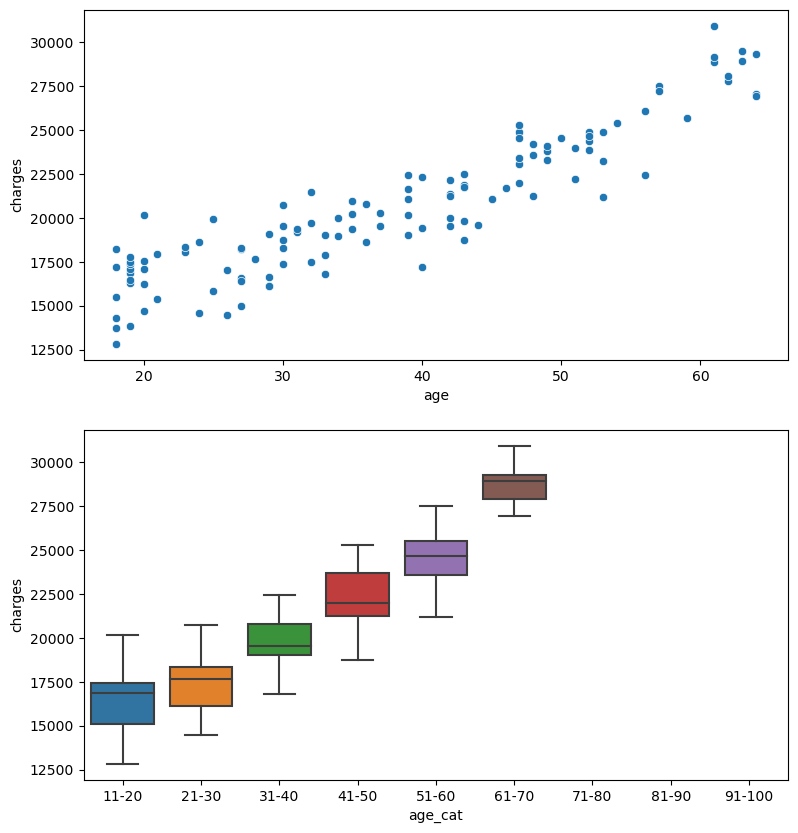

In [62]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.scatterplot(data= df_3_smk_yes,x= 'age',y= 'charges')


plt.subplot(2,2,3)
sns.boxplot(data= df_3_smk_yes,x='age_cat',y='charges')

In [63]:
ff=df_3_smk_yes[ (df_3_smk_yes['charges']>25000) &  (df_3_smk_yes['age_cat']=='11-20')].index
df_3_smk_yes.drop(index= ff,inplace=True)
smk_yes_age_af_del = df_3_smk_yes[['age']]
smk_yes_charges_af_del = df_3_smk_yes['charges']


C:\Users\USER\AppData\Local\Temp\ipykernel_6928\1704047937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_smk_yes.drop(index= ff,inplace=True)


In [64]:
x_train_af_del, x_test_af_del, y_train_af_del, y_test_af_del = train_test_split(smk_yes_age_af_del, smk_yes_charges_af_del , test_size=0.33, random_state=42)


In [69]:
smk_yes_af_del= LinearRegression()
smk_yes_af_del.fit(x_train_af_del,y_train_af_del)
smk_yes_af_del_predict= smk_yes_af_del.predict(x_test_af_del)


smk_yes_af_del.score(x_test_af_del,y_test_af_del)

0.8830720742838009